<a href="https://colab.research.google.com/github/olgasherbiena/KPI/blob/IDA/1_5_Data_visualization_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Visualization

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_wine

## Load the Data

In [ ]:
wine_data = load_wine()

In [ ]:
wine_data['feature_names']

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [ ]:
df_wine = pd.DataFrame(wine_data['data'][:, :5], columns=wine_data['feature_names'][:5]) # simplify for visualization
df_wine['target'] = wine_data['target']
feature_names = wine_data['feature_names'][:5]

df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   alcohol            178 non-null    float64
 1   malic_acid         178 non-null    float64
 2   ash                178 non-null    float64
 3   alcalinity_of_ash  178 non-null    float64
 4   magnesium          178 non-null    float64
 5   target             178 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 8.5 KB


In [ ]:
# unique class labels
print("Unique classes:", set(df_wine['target']))

# human-readable names of the classes
print("Class names:", wine_data.target_names)

Unique classes: {0, 1, 2}
Class names: ['class_0' 'class_1' 'class_2']


# Pairwise correlation of columns

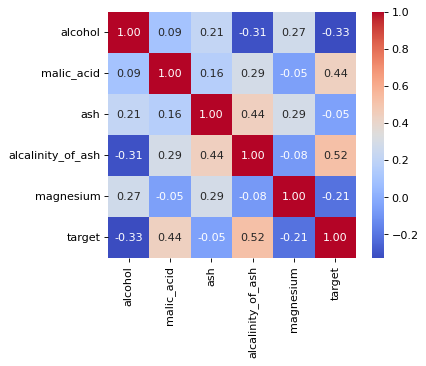

In [ ]:
corr = df_wine.corr()
fig, ax = plt.subplots(figsize=(5, 4), dpi = 80)
sns.heatmap(corr,  cmap='coolwarm', annot=True, fmt=".2f")
plt.show()
# This heatmap shows the correlation between all numeric features in the wine dataset.
# Values close to 1 indicate a strong positive relationship, values close to -1 indicate a strong negative relationship,
# and values near 0 mean little or no linear correlation.
# Correlation with the target can be useful, because it shows which features are most related to the class labels.
#However, strong correlation between features themselves may cause multicollinearity,
#which can be a problem for some machine learning models.

## Boxplots
for more examples see https://seaborn.pydata.org/generated/seaborn.boxplot.html

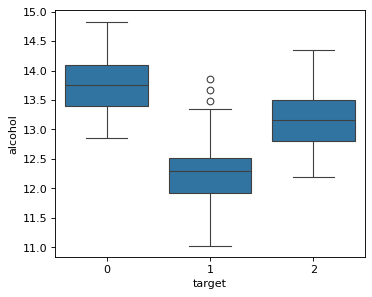

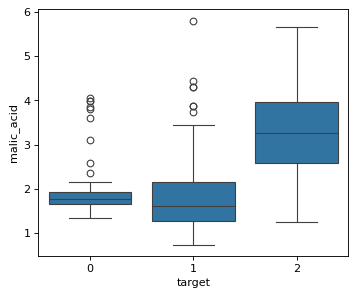

In [ ]:
for i in range(len(feature_names)//2):
    figure = plt.figure(figsize=(5, 4), dpi = 80)
    ax = sns.boxplot(x='target', y=feature_names[i], data=df_wine)

# Each boxplot compares the distribution of a single feature across the three wine classes.
# The box shows the interquartile range (IQR), the line inside is the median, and the whiskers/outliers indicate variability.
# If the boxes for different classes do not overlap much, it means that this feature is a good candidate for distinguishing between wine types.

## Pairplot
for more examples see
https://seaborn.pydata.org/generated/seaborn.pairplot.html

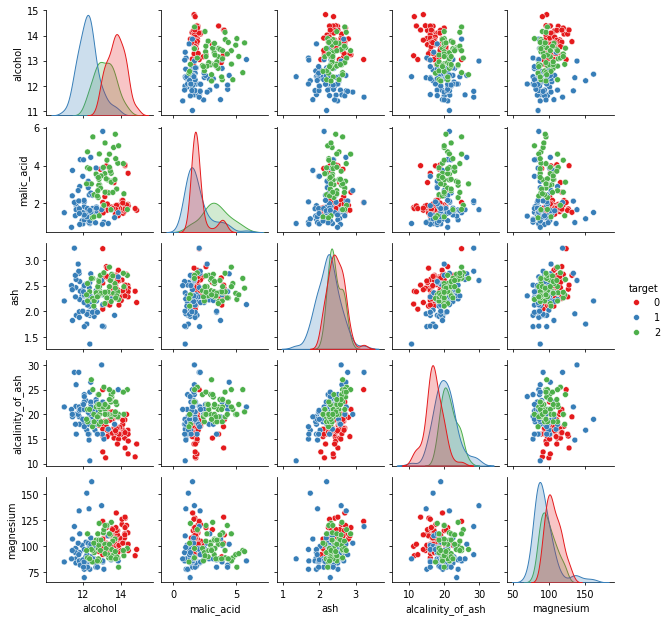

In [ ]:
plt.rcParams['figure.dpi'] = 70   # дефолт ~100, для зменшеня розміру зображення
sns.pairplot(df_wine, hue="target", palette = 'Set1',  height=1.8)
plt.show()
#The pairplot shows scatterplots for every pair of features, colored by the wine class.
# This helps us visually check if classes are separable in 2D feature spaces and also reveals potential correlations or clusters.
# Diagonal plots show the distribution (histogram/density) of each single feature.

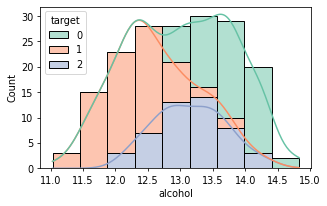

In [ ]:
plt.figure(figsize=(5,3))
sns.histplot(data=df_wine, x="alcohol", hue="target", kde=True, multiple="stack", palette = 'Set2')
plt.show()
# This shows the distribution of one feature (alcohol) for each wine class.
# Overlaps indicate similarities, while clear separation suggests this feature helps classification.
# kde=True adds a smooth density curve on top of the histogram

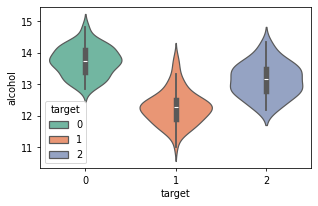

In [ ]:
plt.figure(figsize=(5,3))
sns.violinplot(x="target", y="alcohol", hue="target",
               data=df_wine, palette="Set2")
plt.show()
#A violin plot combines a boxplot with a density curve, so you can see both the summary
# statistics and the shape of the distribution for each class.